In [2]:
import pandas as pd
import numpy as np 
import math as mt

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [3]:
step = pd.read_csv("../step.csv")
step.head()

,Timestamp,LUX,LDR,Vo,Vi,LED
0,1001064,0.0,10,0.0,0.0,0
1,1003092,0.0,10,0.0,0.0,0
2,1005156,0.0,10,0.0,0.0,0
3,1007220,0.0,10,0.0,0.0,0
4,1009280,0.0,9,0.0,0.0,0


In [4]:
step.tail()

,Timestamp,LUX,LDR,Vo,Vi,LED
163,1408128,64.0,732,3.6,2.5,128
164,1410680,64.9,734,3.6,2.5,128
165,1413236,65.4,735,3.6,2.5,128
166,1415780,64.5,733,3.6,2.5,128
167,1418328,64.0,732,3.6,2.5,128


c:\users\fanm\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


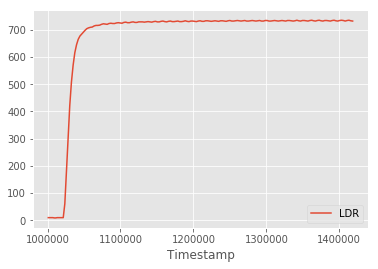

In [6]:
step.plot(x='Timestamp', y=['LDR'])

c:\users\fanm\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


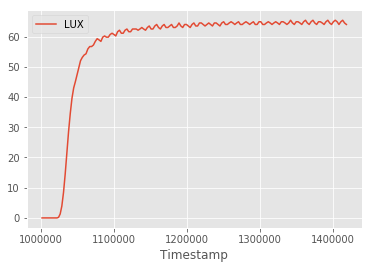

In [7]:
step.plot(x='Timestamp', y=['LUX'])

In [8]:
maxval = step['Vo'].max()
maxval

3.6

In [9]:
mindex = step[step['Vi']>0].head(1).index[0]
minval = step[step['Vi']>0].head(1).Vo.values[0]
(minval+(1-mt.exp(-1))*(maxval-minval))

2.2756340117828078

In [10]:
# finding the time constant
# MeanStep[(MeanStep['Vo']-(1-exp(-1)*3.6).abs().argsort()[:2]]
index = abs(step['Vo'] - (minval+(1-mt.exp(-1))*(maxval-minval))).idxmin()

In [11]:
ti = step.iloc[mindex].Timestamp
ti

1021556.0

In [12]:
tf = step.iloc[index].Timestamp
tf

1030484.0

In [13]:
t = tf-ti

In [14]:
t/1000

8.928

In [15]:
KoLux = (step.LUX.max()-step.LUX.min())/(step.LED.max()-step.LED.min())
KoLux

0.5109375

In [16]:
Ko = (step.Vo.max()-step.Vo.min())/(step.Vi.max()-step.Vi.min())
Ko

1.44

In [17]:
step.Vi.max()

2.5

c:\users\fanm\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


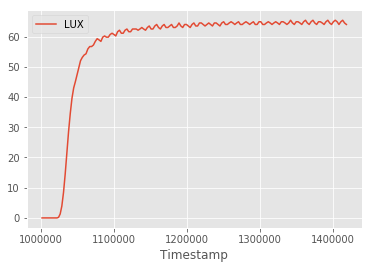

In [18]:
step.plot(x='Timestamp', y=['LUX'])